<a href="https://colab.research.google.com/github/redboycode/udemycourses/blob/main/lazy_prog_numpy/Scipy_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PDF and CDF


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from scipy.stats import norm

In [6]:
x=np.linspace(-6,6,1000)

In [8]:
fx=norm.pdf(x,loc=0,scale=1)

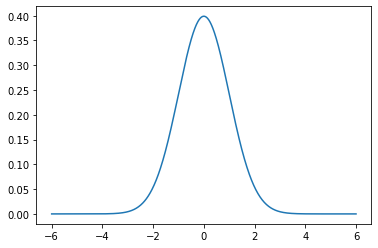

In [10]:
plt.plot(x,fx);

In [11]:
Fx=norm.cdf(x,loc=0,scale=1)

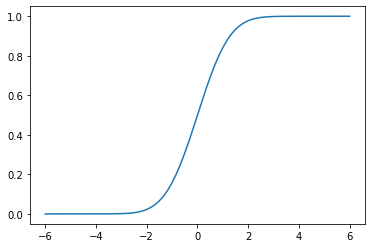

In [12]:
plt.plot(x,Fx);

In [13]:
logfx=norm.logpdf(x,loc=0,scale=1)

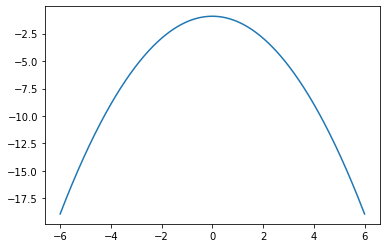

In [15]:
plt.plot(x,logfx);

# Convolution

In [17]:
#common operation in DL, stats
from PIL import Image

In [18]:
!wget https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png

--2021-02-21 13:31:34--  https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘Lenna_(test_image).png’

Lenna_(test_image). 100%[===================>] 462.73K  --.-KB/s    in 0.06s   

2021-02-21 13:31:34 (7.75 MB/s) - ‘Lenna_(test_image).png’ saved [473831/473831]



In [46]:
im=Image.open('Lenna_(test_image).png')
np.array(im).shape

(512, 512, 3)

In [47]:
gray = np.mean(im, axis=2) #axis 0 and 1 are width and height
gray.shape

(512, 512)

In [48]:
x=np.linspace(-6,6,50)
x

array([-6.        , -5.75510204, -5.51020408, -5.26530612, -5.02040816,
       -4.7755102 , -4.53061224, -4.28571429, -4.04081633, -3.79591837,
       -3.55102041, -3.30612245, -3.06122449, -2.81632653, -2.57142857,
       -2.32653061, -2.08163265, -1.83673469, -1.59183673, -1.34693878,
       -1.10204082, -0.85714286, -0.6122449 , -0.36734694, -0.12244898,
        0.12244898,  0.36734694,  0.6122449 ,  0.85714286,  1.10204082,
        1.34693878,  1.59183673,  1.83673469,  2.08163265,  2.32653061,
        2.57142857,  2.81632653,  3.06122449,  3.30612245,  3.55102041,
        3.79591837,  4.04081633,  4.28571429,  4.53061224,  4.7755102 ,
        5.02040816,  5.26530612,  5.51020408,  5.75510204,  6.        ])

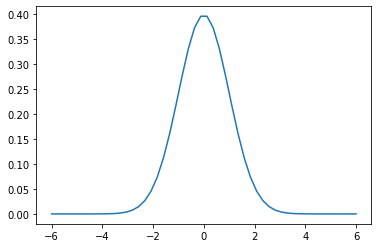

In [49]:
fx=norm.pdf(x,loc=0,scale=1)
plt.plot(x,fx)

In [50]:
filt=np.outer(fx,fx) #gaussian filter, 2d spherical gauss, ignore constants and use outer product with itself
filt

array([[3.69163524e-17, 1.55719274e-16, 6.18613137e-16, ...,
        6.18613137e-16, 1.55719274e-16, 3.69163524e-17],
       [1.55719274e-16, 6.56849623e-16, 2.60941242e-15, ...,
        2.60941242e-15, 6.56849623e-16, 1.55719274e-16],
       [6.18613137e-16, 2.60941242e-15, 1.03661979e-14, ...,
        1.03661979e-14, 2.60941242e-15, 6.18613137e-16],
       ...,
       [6.18613137e-16, 2.60941242e-15, 1.03661979e-14, ...,
        1.03661979e-14, 2.60941242e-15, 6.18613137e-16],
       [1.55719274e-16, 6.56849623e-16, 2.60941242e-15, ...,
        2.60941242e-15, 6.56849623e-16, 1.55719274e-16],
       [3.69163524e-17, 1.55719274e-16, 6.18613137e-16, ...,
        6.18613137e-16, 1.55719274e-16, 3.69163524e-17]])

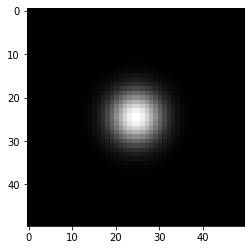

In [51]:
plt.imshow(filt,cmap='gray') #show the gaussian filter in grayscale as an image
#basically just a glowing ball

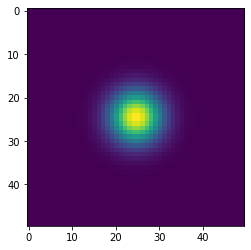

In [52]:
plt.imshow(filt)

In [53]:
from scipy.signal import convolve2d

In [54]:
out =convolve2d(gray,filt) #convole means apply the filter to the gray image
#convolve 2d applies on a 2d array, hence we took out the gray bit

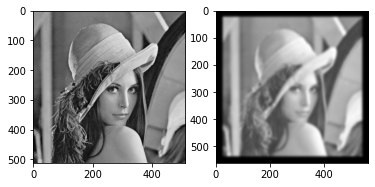

In [34]:
plt.subplot(1,2,1)
plt.imshow(gray,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(out,cmap='gray')

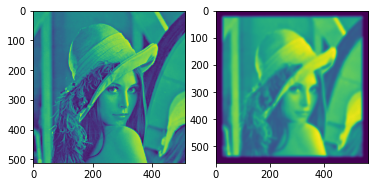

In [55]:
plt.subplot(1,2,1)
plt.imshow(gray)
plt.subplot(1,2,2)
plt.imshow(out)

# ScipyExercise

In [56]:
#implement edge detection
Hx=np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
Hx

array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

In [57]:
Hy=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
Hy

array([[ 1,  2,  1],
       [ 0,  0,  0],
       [-1, -2, -1]])

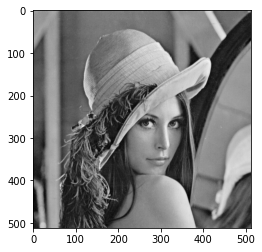

In [59]:
#convole hx and hy with grayscale image to get gx and gy
plt.imshow(gray,cmap='gray')

In [60]:
Gx=convolve2d(gray,Hx)

In [61]:
Gy=convolve2d(gray,Hy)

In [62]:
type(Gx)

numpy.ndarray

In [63]:
G = np.sqrt(np.square(Gx) ++ np.square(Gy))

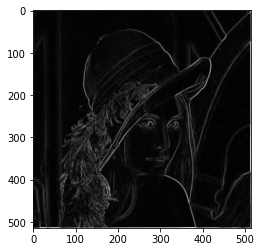

In [65]:
plt.imshow(G,cmap='gray')